### Import libraries

In [5]:
# Load Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Customize

In [6]:
# Customize parameters
my_input_file ='0403 my_input.csv'
my_x_values = ['Project_Score', 'Training_Hours', 'Absenteeism_Rate', 'Peer_Feedback']
my_y_value = 'High_Performer'

my_confusion_plot='0403 confusion_matrix.png'
my_feature_plot='0403 feature_plot.png'

### Load data and fit classifier

In [7]:
data = pd.read_csv(my_input_file)

# Define Features and Target 
X = data[my_x_values]
y = data[my_y_value]

# Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Random Forest Classifier 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict, evaluate, and report

Classification Report:
              precision    recall  f1-score   support

           0      0.667     1.000     0.800         2
           1      1.000     0.667     0.800         3

    accuracy                          0.800         5
   macro avg      0.833     0.833     0.800         5
weighted avg      0.867     0.800     0.800         5


 Confusion Matrix:


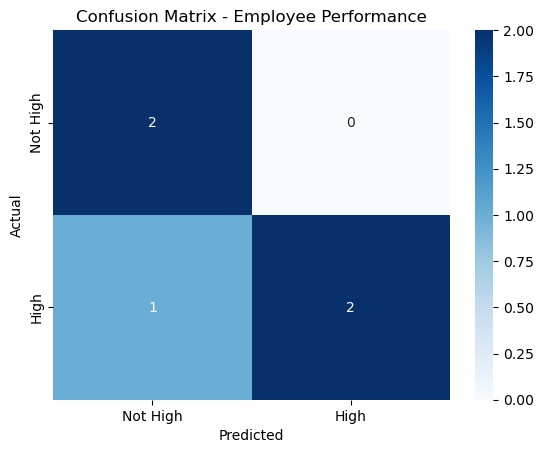

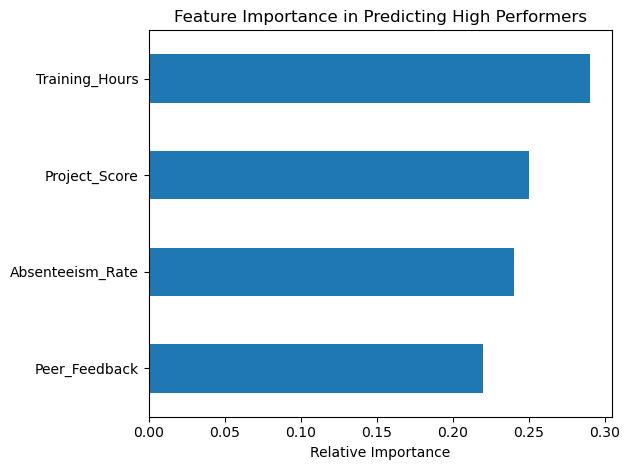


Updated Data with Predictions:
     Employee_ID  High_Performer  Predicted_High_Performer
0             1               1                         0
1             2               1                         1
2             3               0                         0
3             4               1                         1
4             5               0                         0
5             6               1                         1
6             7               0                         0
7             8               0                         0
8             9               1                         1
9            10               1                         1
10           11               0                         0
11           12               0                         0
12           13               1                         1
13           14               0                         0
14           15               1                         1


In [8]:
# Predict and Evaluate 
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not High', 'High'], yticklabels=['Not High', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Employee Performance")
plt.savefig(my_confusion_plot)
plt.show()

# Feature Importance
feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
feat_importance.plot(kind='barh', title='Feature Importance in Predicting High Performers')
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.savefig(my_feature_plot)

plt.show()

#  Add Predictions to Original 
data['Predicted_High_Performer'] = rf_model.predict(X)
print("\nUpdated Data with Predictions:\n", data[['Employee_ID', 'High_Performer', 'Predicted_High_Performer']])
